In [59]:
import numpy as np
import matplotlib.pyplot as plt

THRESHOLD_VOLTAGE = 30

def izhikevich_neuron(recovery_rate, sensitivity, reset_voltage, reset_recovery, v_init, u_init, current, T, dt):
    """
    Simulates an Izhikevich neuron for a given time period and returns the membrane potential at each time step.
    """
    num_steps = int(T / dt) + 1
    v = np.zeros(num_steps)
    u = np.zeros(num_steps)
    v[0] = v_init
    u[0] = u_init

    for t in range(1, num_steps):
        v[t] = v[t - 1] + dt * (0.04 * v[t - 1] ** 2 + 5 * v[t - 1] + 140 - u[t - 1] + current)
        u[t] = u[t - 1] + dt * (recovery_rate * (sensitivity * v[t - 1] - u[t - 1]))

        if v[t] >= THRESHOLD_VOLTAGE:
            v[t] = reset_voltage
            u[t] = u[t] + reset_recovery

    return v





In [60]:
def plot_firing_pattern(pattern_name, pattern_params):
    """
    Plots the firing pattern of an Izhikevich neuron with the given parameters.
    """
    recovery_rate, sensitivity, reset_voltage, reset_recovery, v_init, u_init, current, T, dt = pattern_params
    v = izhikevich_neuron(recovery_rate, sensitivity, reset_voltage, reset_recovery, v_init, u_init, current, T, dt)
    time = np.arange(0, T + dt, dt)

    plt.figure(figsize=(10, 5))
    plt.plot(time, v, label=f'Izhikevich - {pattern_name}')
    plt.title(f'Izhikevich Neuron Firing Pattern: {pattern_name}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.legend()
    plt.show()

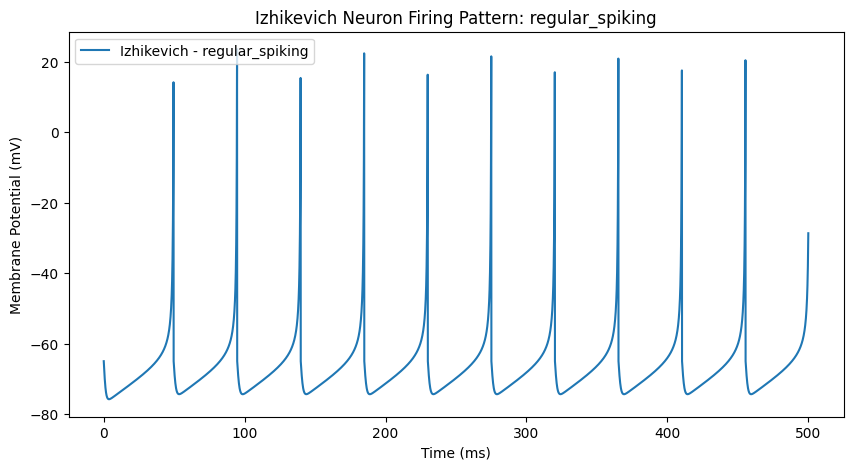

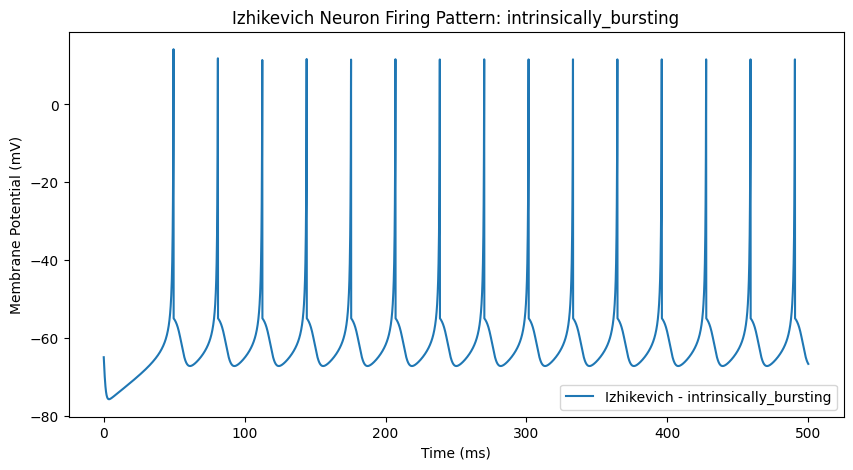

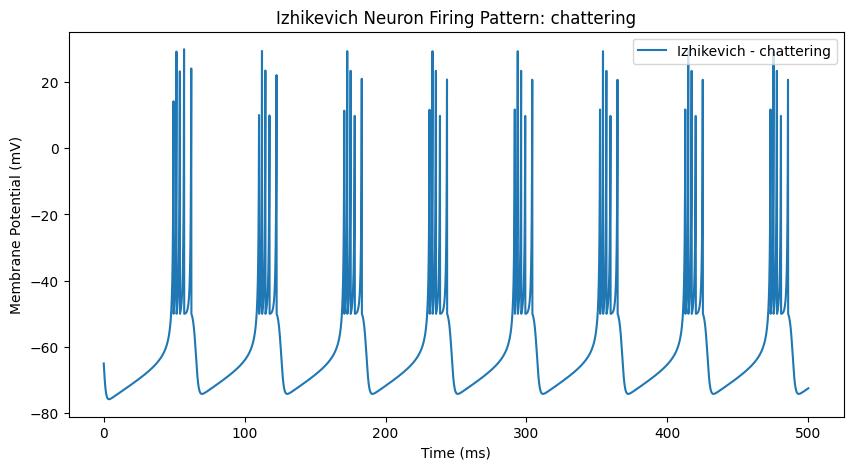

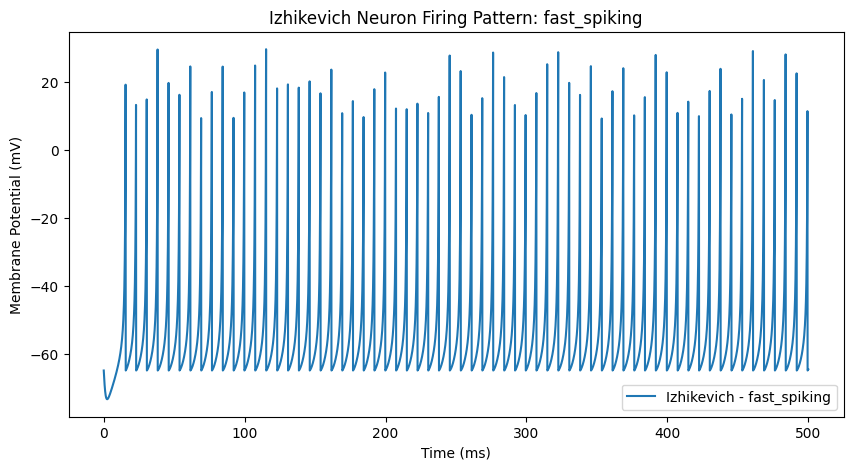

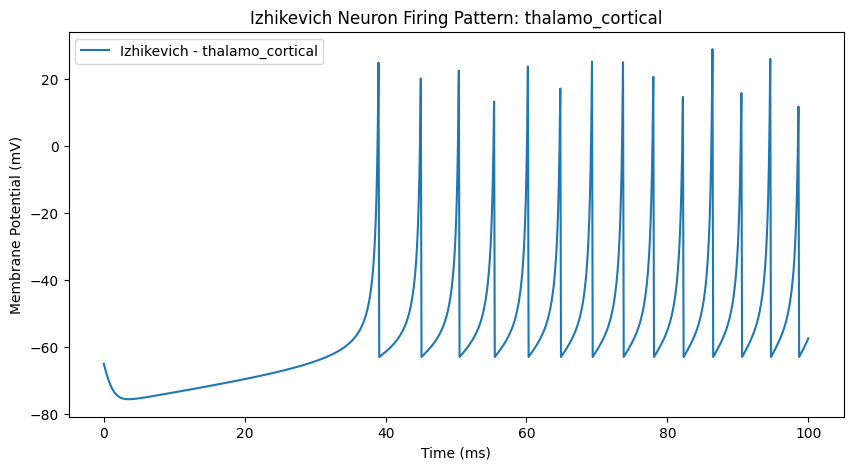

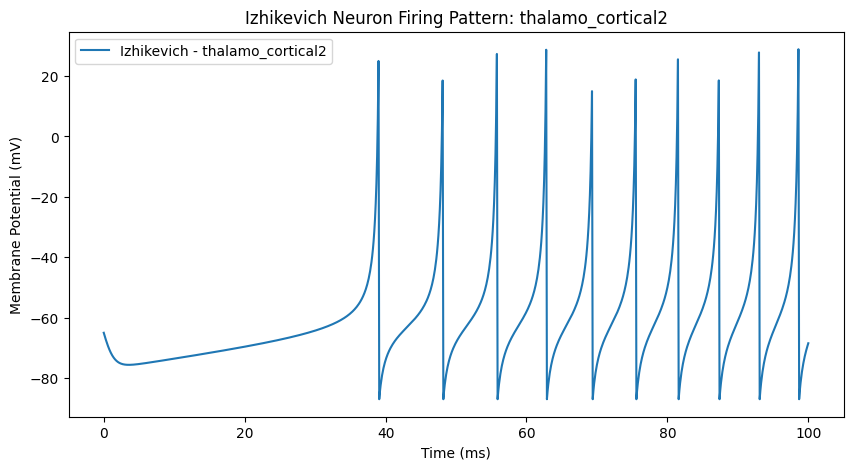

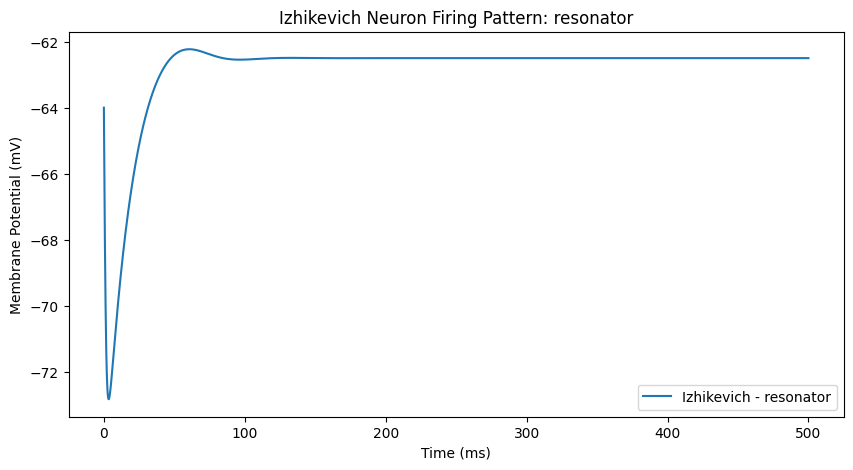

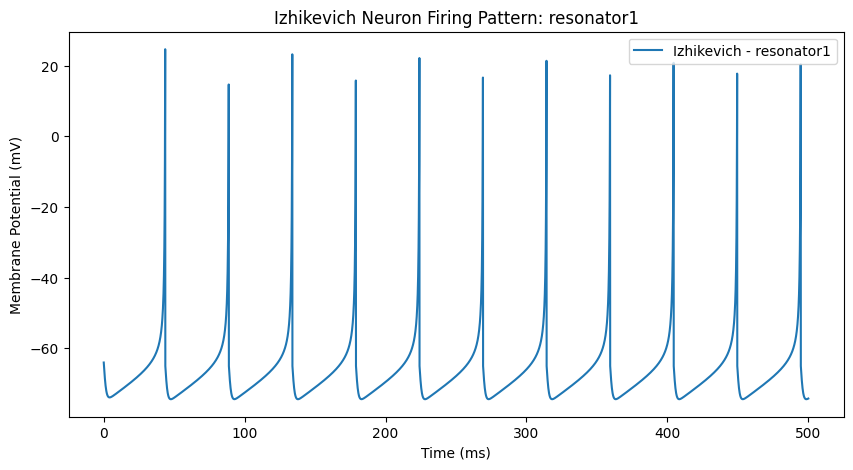

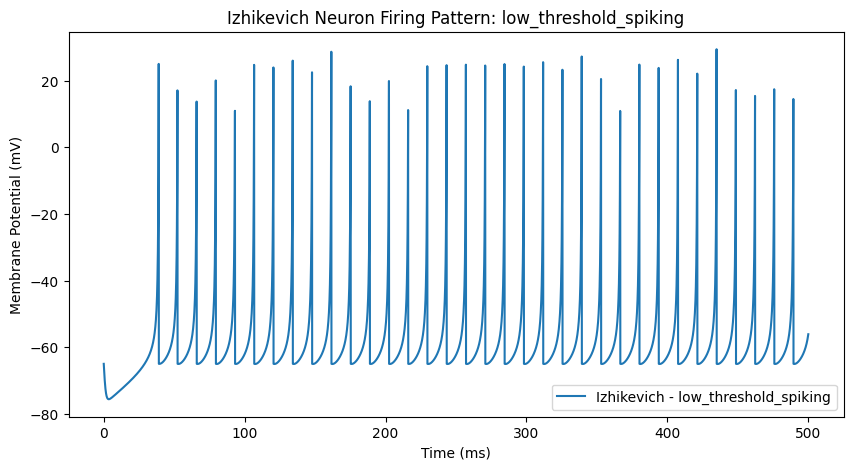

In [61]:


# Parameters for different firing patterns
params = {

    'regular_spiking': (0.02, 0.2, -65, 8, -65, 2, 10, 500, 0.1),
    'intrinsically_bursting': (0.02, 0.2, -55, 4, -65, 2, 10, 500, 0.1),
    'chattering': (0.02, 0.2, -50, 2, -65, 2, 10, 500, 0.1),
    'fast_spiking': (0.1, 0.2, -65, 2, -65, 2, 10, 500, 0.1),
    'thalamo_cortical': (0.02, 0.25, -63, 0.05, -65, 2, 10, 100, 0.1),
    'thalamo_cortical2': (0.02, 0.25, -87, 0.05, -65, 2, 10, 100, 0.1),
    'resonator': (0.1, 0.1, -65, 2, -64, 0.05, 10, 500, 0.1),  # Adjusted parameters for resonator
    'resonator1': (0.02, 0.2, -65, 8, -64, 0.05, 10, 500, 0.1),  # Adjusted parameters for resonator
    'low_threshold_spiking': (0.02, 0.25, -65, 2, -65, 2, 10, 500, 0.1)
}


# Plotting firing patterns
for pattern_name, pattern_params in params.items():
    plot_firing_pattern(pattern_name, pattern_params)
